## Imports necessários

In [1]:

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [2]:
#Função de auxilio para printar o dado

def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

## Entendimento do dado

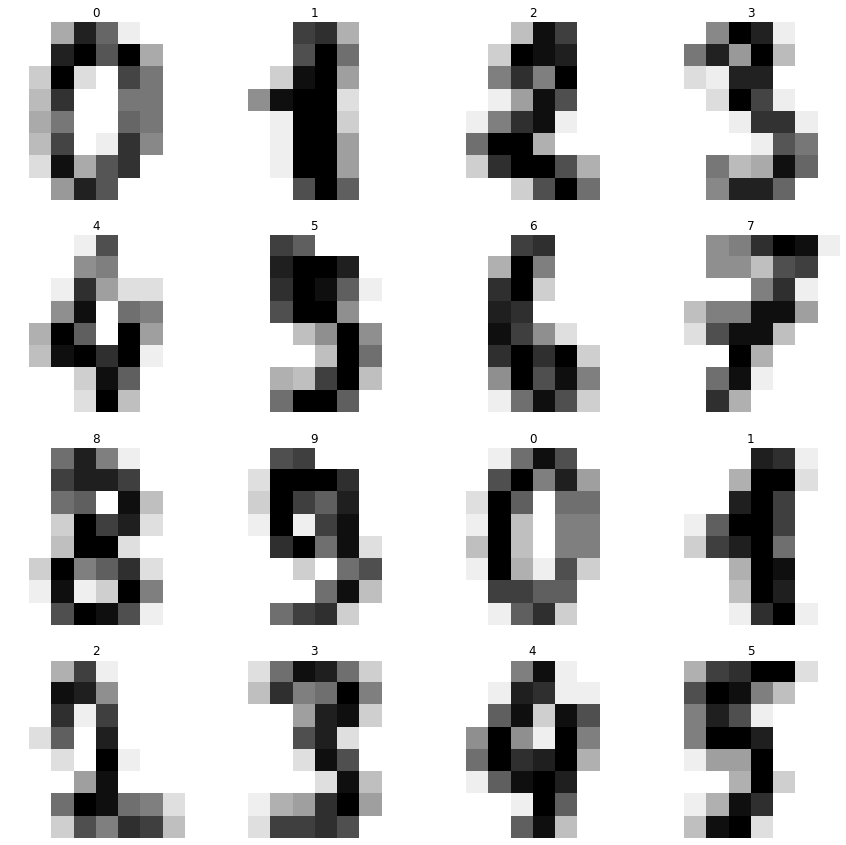

In [3]:
# Para o entendimento do dado, começamos por carregar o dataset de dígitos e utilizamos a função para plotar diferentes representações dos números.
digits = datasets.load_digits()
plot_multi(0)

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Das informações acima e dos testes, podemos verificar que o dataset é um conjunto de matrizes 8x8, ou seja, com 64 atributos que vão de 0 a 16, sendo 0 o branco e 16 o preto na escala de cinza. Ele é composto de 1797 instâncias, que são imagens de números e todos apresentam uma label em digits.target, classificando esses desenhos em números de 0 a 9.

In [5]:
# Aqui podemos ver os tamanhos das imagens (sendo 1797 imagens, em matrizes 8x8) e de suas classificações, tambem 1797.
print(digits.images.shape)
print(digits.target.shape)

(1797, 8, 8)
(1797,)


In [6]:
# verificando a matriz e sua classificação, como printado acima, essa imagem representa um 0 e podemos ver que seus pixels vão de 0 a 16 e sua label é 0.
print(digits.images[0])
print(digits.target[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


## Tratamento do dado <br>
Para a utilização nos modelos, não aplicamos nenhum processo de normalização ou padronização por não acharmos necessário. Apenas redimensionamos as matrizes para arrays de 1 dimensão, que serão as entradas dos modelos, e separamos o dado em treino e teste.

In [7]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data[0])

# Dividindo o dado em 90% treino e 10% teste
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.1, shuffle=False)

#Abaixo podemos ver o mesmo vertor apresentado antes que representa o número 0 em apenas 1 dimensão.

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


## Treino e teste do primeiro modelo 
### C-Support Vector Classification

In [8]:
# Criação do primeiro classifier: a support vector classifier
svc = svm.SVC(gamma=0.001, C=100)

# Treino do modelo criado
svc.fit(x_train, y_train)

# Teste do modelo com a predição dos dígitos passados
predicted_svc = svc.predict(x_test)

## Resultados do primeiro modelo
Para apresentação dos resultados, apresentamos uma representação gráfica, seguida de métricas úteis para a comparação dos modelos.

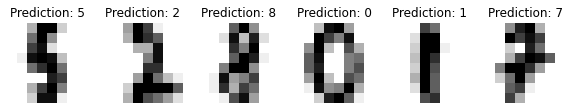

In [9]:
#Aqui só uma representação gráfica do teste realizado e qual foi a predição feita pelo modelo.
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test, predicted_svc):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [10]:
print(f"Classification report for classifier {svc}:\n"
      f"{metrics.classification_report(y_test, predicted_svc)}\n")

NameError: name 'clf' is not defined

In [ ]:
metrics.accuracy_score(y_test, predicted_svc)

In [ ]:
disp = metrics.plot_confusion_matrix(svc, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

## Treino do segundo modelo
### Multi-layer Perceptron classifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True, max_iter=500)

mlp.fit(x_train,y_train)

predicted_mlp = mlp.predict(x_test)

## Resultados do segundo modelo

In [ ]:
print(f"Classification report for classifier {mlp}:\n"
      f"{metrics.classification_report(y_test, predicted_mlp)}\n")

In [ ]:
metrics.accuracy_score(y_test, predicted_mlp)

In [ ]:
disp = metrics.plot_confusion_matrix(mlp, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

# Conclusões
Analisando os f1-score dos dois modelos obtivemos bons resultados: os dois acima de 0.90 em uma escala de 0 a 1.0. O classificador 

# Referências
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py <br>
https://medium.com/@navyashree.raghupatro/recognizing-handwritten-digits-with-scikit-learn-8d248dc01b6d <br>
https://thedatafrog.com/en/articles/handwritten-digit-recognition-scikit-learn/ <br>
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html